### Homework 3: Exploring Musicals in IMDb
Name:  Jennifer Truong
   
UT EID:  JAT5244
    
Date:  2/25/2023

Data, data everywhere, and not a insight to spare!  The internet movie database (IMDb) was one of the first really cool things to hit the internet in the 1990's.  If you are interested, read a little bit about this history of the website on its [wikipedia entry](https://en.wikipedia.org/wiki/IMDb).

Today, the data that powers the IMDb website is [available](https://www.imdb.com/interfaces/) for personal and non-commercial use. The file `imdb_musicals.csv` that comes with this assignment was made by fetching the data (Feb 2021), filtering out just the movies that included "Musical" as a genre, and merging that data with the average ratings and number of votes. The column for `tconst (string) - alphanumeric unique identifier of the title`; it is named `uid` (a common name for the unique identifier, or database key).  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the data
df = pd.read_csv('imdb_musicals.csv')

#### Question 1 - Data Wrangling

Each item in our table has the following attributes:
  - `uid` 
  - `title`
  - `year`
  - `runtime_mins`
  - `ave_rating`
  - `num_votes`
  
We want to visualize how this attributes interact with each other.  Some of these attributes are missing for some of the movies in our data set.  Perform "list wise deletion", aka, drop all the rows from the table that are missing any values. Use [dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html). Check your work by verifying there are $5306$ movies remaining in the dataframe

In [2]:
# Drop all the rows from table that are missing any values
new_df = df.dropna()
new_df

,uid,title,year,runtime_mins,ave_rating,num_votes
0,tt0009771,The Merry Widow,1920.0,70.0,4.7,14.0
1,tt0016029,The Little Colonel,1935.0,81.0,7.1,1460.0
2,tt0016906,Frivolinas,2014.0,80.0,5.6,15.0
3,tt0018037,The Jazz Singer,1927.0,88.0,6.5,9080.0
5,tt0019388,The Singing Fool,1927.0,105.0,6.2,209.0
...,...,...,...,...,...,...
9539,tt9770432,The Incredible Jake Parker,2020.0,75.0,8.6,7.0
9542,tt9811798,0009: The Sharks Make Contact,2019.0,133.0,1.5,46.0
9546,tt9844062,Count Orlov: The Musical,2019.0,123.0,2.3,6.0
9556,tt9882750,King of Prism: Shiny Seven Stars,2019.0,70.0,4.7,6.0


#### Question 2 - What _is_ good?

Movies are rated on a 1-10 scale, but in our musical data set we want to understand what those distributions of the ratings look like.  

Plot a histogram of the ratings. Use 18 bins in your histogram.  

Set the x-axis label to "Average Rating". 

Set the title of the plot to "Distribution of Musical Ratings".

What is the median rating? Mark that on the histogram.

Text(3.5, 950, 'Median rating: 6.3')

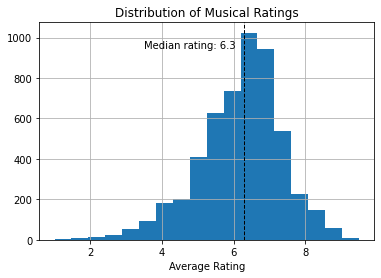

In [3]:
# plot histogram of the ratings
ratings = new_df['ave_rating']
ratings.hist(bins = 18)
median_ratings = str(ratings.median())
plt.axvline(ratings.median(), color = 'k', linestyle = 'dashed', linewidth = 1)

# label the histogram plot
plt.xlabel("Average Rating")
plt.title("Distribution of Musical Ratings")
plt.text(3.5, 950, "Median rating: " + median_ratings)

#### Question 3 - Has our attention span changed? 

Plot the mean runtime of the musical as a function of year. 

Have musicals gotten longer, shorter, or stayed the same?

Set the y-axis label to "Average Runtime". 

Set the title of the plot to "Average Musical Runtimes Over the Years".

The year on the x-axis should be formatted properly (this is the year 2021, not the year 2,021). The x-axis should start at the min of the year in the dataset. 

(1910.0, 2021.0)

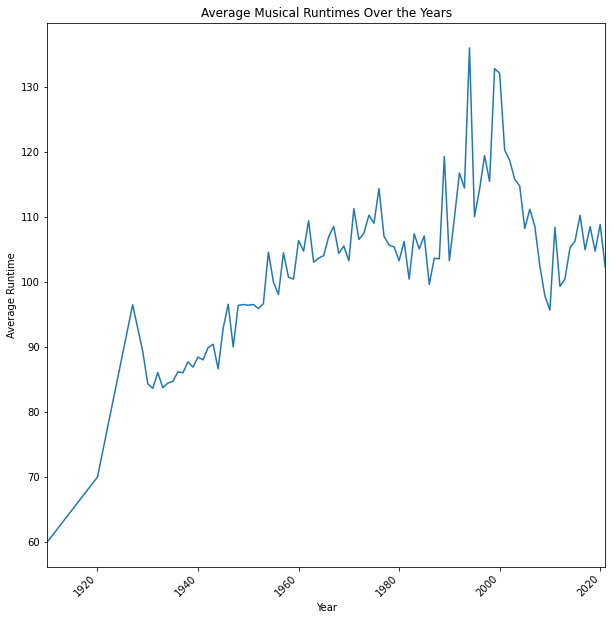

In [4]:
# Calculate the mean runtime of the musical
mean_runtimes = new_df.groupby('year')['runtime_mins'].mean()

# Plot the mean runtime of the musical as a function of year
plt.rcParams["figure.figsize"] = (10, 10)
plt.plot(mean_runtimes.index, mean_runtimes.values)

# Label the plot graph
plt.xlabel('Year')
plt.ylabel('Average Runtime')
plt.title('Average Musical Runtimes Over the Years')

# Format the x-axis
plt.xticks(rotation=45, ha='right')
plt.xlim(min(mean_runtimes.index), 2021)

There was a time period where the average minutes of runtime for musicals were at its peak around the years 1990 to 2000. However, after that the runtimes have decreased again- but it's not at it's lowest compared to the first several musical. One could say that the overall curve, excluding the peaks around 1990 to 200, is a logarithmic growth curve. So the musicals mean runtime is about the same. 

#### Question 4 - When were Musicals made?

Visualize the number of musicals made each year using an area chart.

The y-axis should be labeled "Count of Musicals".

The graph should be titled "Number of Musicals Made by Year".

The year on the x-axis should be formatted properly.

Text(0, 0.5, 'Count of Musicals')

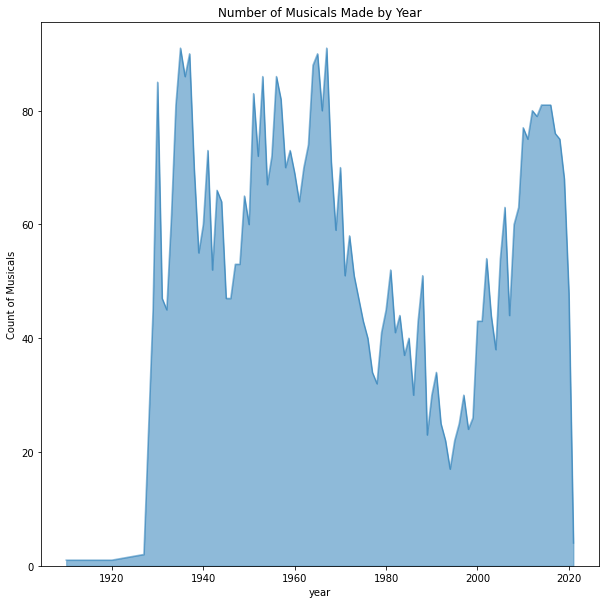

In [5]:
# visualize the number of musicals made each year using an area chart.

# plot area chart
years = new_df.groupby(['year']).size()
plt.rcParams["figure.figsize"] = (10, 10)
years.plot( kind = 'area', stacked = False)

# label the area chart
plt.title('Number of Musicals Made by Year')
plt.ylabel('Count of Musicals')

#### Question 5 - Explore the Musicals by Popularity

Create a scatter plot, where each dot is a musical.  

The position of the musical is encoded by year (x-axis), and average rating (y-axis). 

The size (area) of the dot should encode the number of votes it received on IMDb. Scale the radius of the dot accordingly.

The y-axis should be labeled "Average Rating".

The graph should be titled "Scatter plot of Musicals".

The year on the x-axis should be formatted properly.


Text(0.5, 0, 'Year')

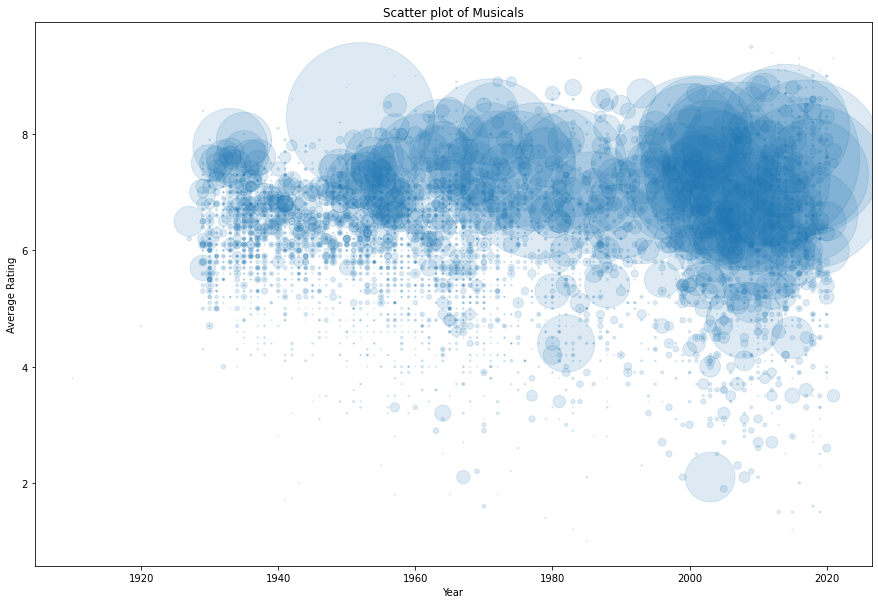

In [6]:
# create a scatter plot, where each dot is a musical.
# y-axis = year, x-axis = average rating 
# size of dot is number of votes
plt.rcParams["figure.figsize"] = (15, 10)
plt.scatter( x = new_df['year'], y = new_df['ave_rating'], s = new_df['num_votes']/10, alpha = 0.15)


# label the scatter plot
plt.title('Scatter plot of Musicals')
plt.ylabel('Average Rating')
plt.xlabel('Year')